In [1]:
import cv2 as cv
import numpy as np 
from matplotlib import pyplot as plt
import imutils

In [2]:
image = cv.imread("maze08.jpg",1)
orig = image.copy()

In [3]:
image

array([[[ 92,  98, 103],
        [ 93,  99, 104],
        [ 94, 100, 105],
        ...,
        [105, 111, 116],
        [108, 114, 119],
        [112, 118, 123]],

       [[ 92,  98, 103],
        [ 93,  99, 104],
        [ 94, 100, 105],
        ...,
        [109, 115, 120],
        [111, 117, 122],
        [115, 121, 126]],

       [[ 91,  97, 102],
        [ 91,  97, 102],
        [ 92,  98, 103],
        ...,
        [110, 116, 121],
        [112, 118, 123],
        [115, 121, 126]],

       ...,

       [[144, 147, 155],
        [141, 144, 152],
        [142, 145, 153],
        ...,
        [178, 178, 184],
        [179, 179, 185],
        [182, 182, 188]],

       [[144, 147, 155],
        [143, 146, 154],
        [144, 147, 155],
        ...,
        [178, 178, 184],
        [178, 178, 184],
        [181, 181, 187]],

       [[143, 146, 154],
        [143, 146, 154],
        [144, 147, 155],
        ...,
        [178, 178, 184],
        [177, 177, 183],
        [180, 180, 186]]

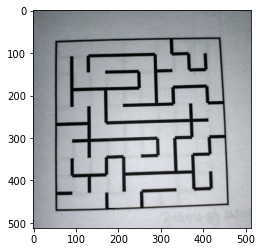

In [4]:
plt.imshow(image)
plt.show()

In [5]:
gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

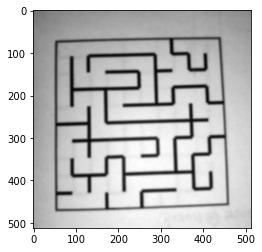

In [6]:
gray = cv.GaussianBlur(gray, (9,9), 2)
plt.imshow(gray)
imgplot1 = plt.imshow(gray, cmap='gray')



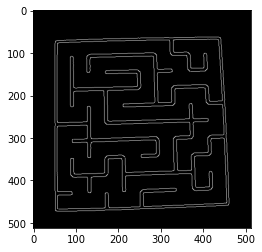

In [7]:
edged = cv.Canny(gray, 50, 200)

plt.imshow(edged)
imgplot = plt.imshow(edged, cmap='gray')

In [8]:
cnts = cv.findContours(edged.copy(), cv.RETR_LIST, cv.CHAIN_APPROX_SIMPLE)
cnts


([array([[[200, 340]],
  
         [[199, 341]],
  
         [[177, 341]],
  
         [[176, 342]],
  
         [[173, 342]],
  
         [[169, 346]],
  
         [[169, 348]],
  
         [[168, 349]],
  
         [[168, 381]],
  
         [[167, 382]],
  
         [[166, 382]],
  
         [[165, 383]],
  
         [[151, 383]],
  
         [[150, 384]],
  
         [[149, 384]],
  
         [[148, 383]],
  
         [[147, 384]],
  
         [[114, 384]],
  
         [[113, 385]],
  
         [[ 99, 385]],
  
         [[ 98, 384]],
  
         [[ 97, 384]],
  
         [[ 96, 383]],
  
         [[ 96, 381]],
  
         [[ 95, 380]],
  
         [[ 95, 349]],
  
         [[ 94, 348]],
  
         [[ 89, 348]],
  
         [[ 88, 349]],
  
         [[ 88, 387]],
  
         [[ 93, 392]],
  
         [[ 96, 392]],
  
         [[ 97, 393]],
  
         [[102, 393]],
  
         [[103, 392]],
  
         [[126, 392]],
  
         [[127, 393]],
  
         [[127, 394]],
  
         [[1

In [9]:
if len(cnts) == 2:
        cnts = cnts[0]

    # if the length of the contours tuple is '3' then we are using
    # either OpenCV v3, v4-pre, or v4-alpha
elif len(cnts) == 3:
        cnts = cnts[1]



In [10]:
cnts = sorted(cnts, key = cv.contourArea, reverse = True)
# loop over the contours

	# show the contour (outline) of the piece of paper


In [11]:
len1 = len(cnts)
len1


7

In [12]:
for c in cnts:
# approximate the contour
    peri = cv.arcLength(c, True)
    approx = cv.approxPolyDP(c, 0.05 * peri, True)
    print(len(approx))
# if our approximated contour has four points, then we
# can assume that we have found our screen
    if len(approx) == 4:
        screenCnt = approx
        break


4


In [13]:
print("STEP 2: Find contours of paper")
print(screenCnt)
cv.drawContours(image, [screenCnt], -1, (0, 255, 0), 2)

STEP 2: Find contours of paper
[[[439  64]]

 [[ 53  72]]

 [[ 54 472]]

 [[459 457]]]


array([[[ 92,  98, 103],
        [ 93,  99, 104],
        [ 94, 100, 105],
        ...,
        [105, 111, 116],
        [108, 114, 119],
        [112, 118, 123]],

       [[ 92,  98, 103],
        [ 93,  99, 104],
        [ 94, 100, 105],
        ...,
        [109, 115, 120],
        [111, 117, 122],
        [115, 121, 126]],

       [[ 91,  97, 102],
        [ 91,  97, 102],
        [ 92,  98, 103],
        ...,
        [110, 116, 121],
        [112, 118, 123],
        [115, 121, 126]],

       ...,

       [[144, 147, 155],
        [141, 144, 152],
        [142, 145, 153],
        ...,
        [178, 178, 184],
        [179, 179, 185],
        [182, 182, 188]],

       [[144, 147, 155],
        [143, 146, 154],
        [144, 147, 155],
        ...,
        [178, 178, 184],
        [178, 178, 184],
        [181, 181, 187]],

       [[143, 146, 154],
        [143, 146, 154],
        [144, 147, 155],
        ...,
        [178, 178, 184],
        [177, 177, 183],
        [180, 180, 186]]

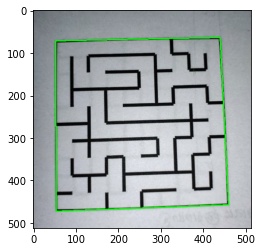

In [14]:
plt.imshow(image)
plt.show()

In [15]:
pts = screenCnt.reshape(4, 2)
print(pts)

[[439  64]
 [ 53  72]
 [ 54 472]
 [459 457]]


In [16]:
rect = np.zeros((4, 2), dtype = "float32")
# the top-left point will have the smallest sum, whereas
# the bottom-right point will have the largest sum
s = pts.sum(axis = 1)
rect[0] = pts[np.argmin(s)]
rect[2] = pts[np.argmax(s)]
# now, compute the difference between the points, the
# top-right point will have the smallest difference,
# whereas the bottom-left will have the largest difference
diff = np.diff(pts, axis = 1)
rect[1] = pts[np.argmin(diff)]
rect[3] = pts[np.argmax(diff)]
# return the ordered coordinates
print(rect)

[[ 53.  72.]
 [439.  64.]
 [459. 457.]
 [ 54. 472.]]


In [17]:
(tl, tr, br, bl) = rect
# compute the width of the new image, which will be the
# maximum distance between bottom-right and bottom-left
# x-coordiates or the top-right and top-left x-coordinates
widthA = np.sqrt(((br[0] - bl[0]) ** 2) + ((br[1] - bl[1]) ** 2))
widthB = np.sqrt(((tr[0] - tl[0]) ** 2) + ((tr[1] - tl[1]) ** 2))
maxWidth = max(int(widthA), int(widthB))
# compute the height of the new image, which will be the
# maximum distance between the top-right and bottom-right
# y-coordinates or the top-left and bottom-left y-coordinates
heightA = np.sqrt(((tr[0] - br[0]) ** 2) + ((tr[1] - br[1]) ** 2))
heightB = np.sqrt(((tl[0] - bl[0]) ** 2) + ((tl[1] - bl[1]) ** 2))
maxHeight = max(int(heightA), int(heightB))
print(f"max width{maxWidth} and max height = {maxHeight}")
# now that we have the dimensions of the new image, construct
# the set of destination points to obtain a "birds eye view",
# (i.e. top-down view) of the image, again specifying points
# in the top-left, top-right, bottom-right, and bottom-left
# order
dst = np.array([
[0, 0],
[maxWidth - 1, 0],
[maxWidth - 1, maxHeight - 1],
[0, maxHeight - 1]], dtype = "float32")
print(dst)

max width405 and max height = 400
[[  0.   0.]
 [404.   0.]
 [404. 399.]
 [  0. 399.]]


In [18]:
M = cv.getPerspectiveTransform(rect, dst)
warped = cv.warpPerspective(orig, M, (maxWidth, maxHeight))

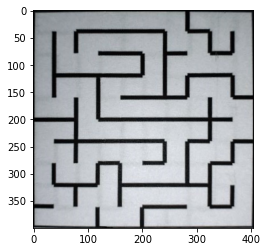

In [19]:
plt.imshow(warped)
plt.show()

In [20]:
gray =  warped
gray = cv.cvtColor(gray, cv.COLOR_BGR2GRAY)
gray.shape
gray = cv.GaussianBlur(gray,(5,5),0)
thresh = cv.copyMakeBorder(gray,5,5,5,5, cv.BORDER_CONSTANT,value=[0,0,0]) 

In [21]:
ret2,thresh2 = cv.threshold(thresh,145,255,cv.THRESH_BINARY)

# changes can be done

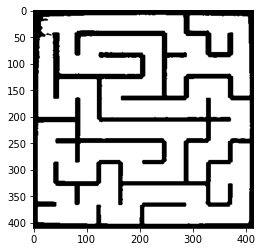

In [22]:
plt.imshow(thresh2,cmap= 'gray')
plt.show()

In [23]:



print(thresh.shape)
resized_image = cv.resize(thresh, (400, 400)) 


(410, 415)


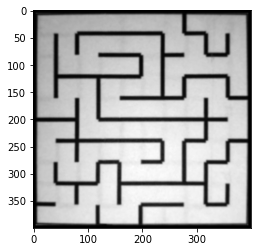

40
40


(400, 400)

In [24]:
plt.imshow(resized_image,cmap= "gray")
cv.imwrite("borderjupyert.jpg",resized_image)
plt.show()
jincrement = resized_image.shape[0]//10
iincrement = resized_image.shape[1]//10
print(jincrement)
print(iincrement)
resized_image.shape

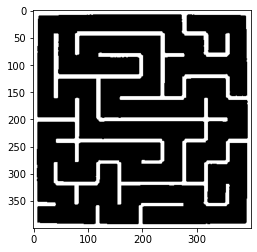

0 0
(44, 44)


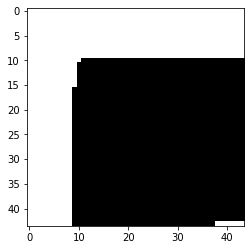

0 1
(44, 49)


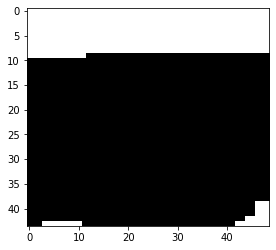

0 2
(44, 49)


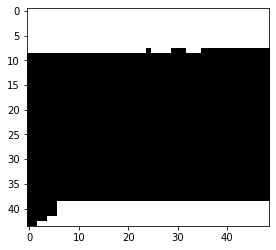

0 3
(44, 49)


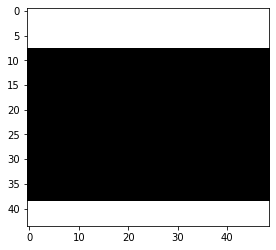

0 4
(44, 49)


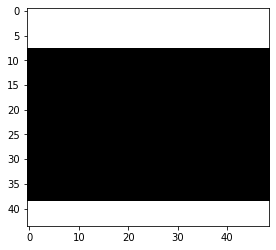

0 5
(44, 49)


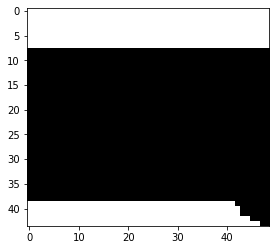

0 6
(44, 49)


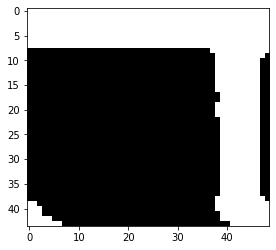

0 7
(44, 49)


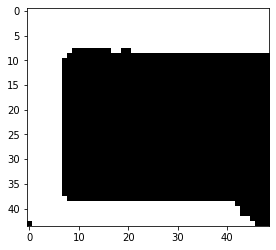

0 8
(44, 49)


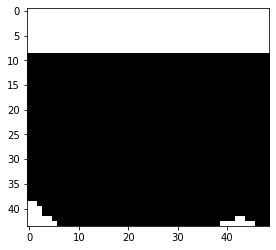

0 9
(44, 45)


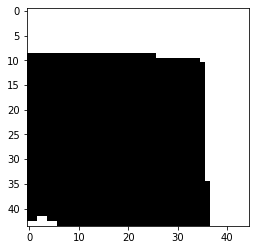

1 0
(43, 44)


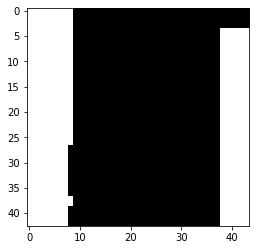

1 1
(43, 49)


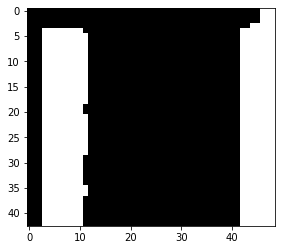

1 2
(43, 49)


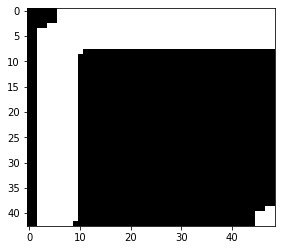

1 3
(43, 49)


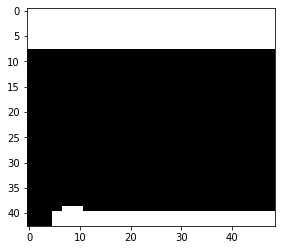

1 4
(43, 49)


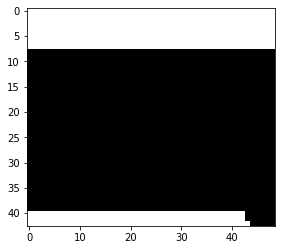

1 5
(43, 49)


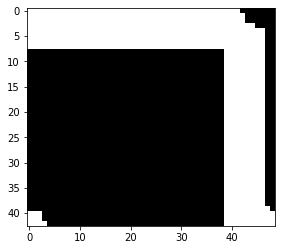

1 6
(43, 49)


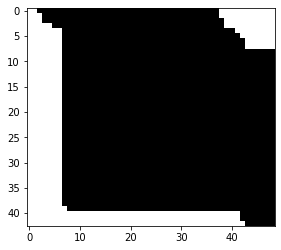

1 7
(43, 49)


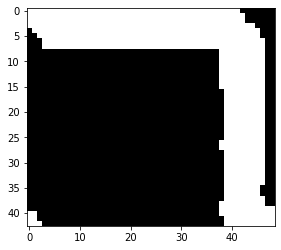

1 8
(43, 49)


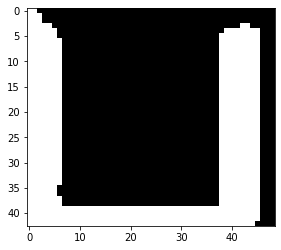

1 9
(43, 45)


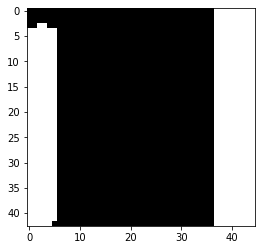

2 0
(43, 44)


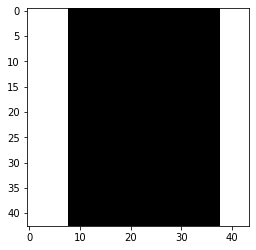

2 1
(43, 49)


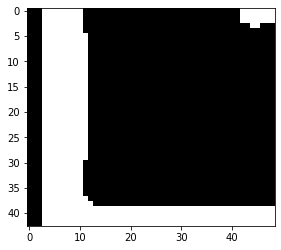

2 2
(43, 49)


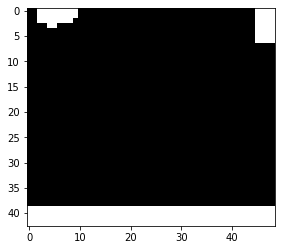

2 3
(43, 49)


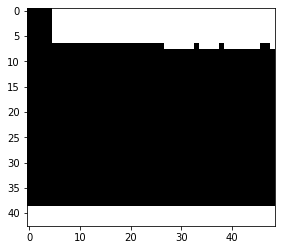

2 4
(43, 49)


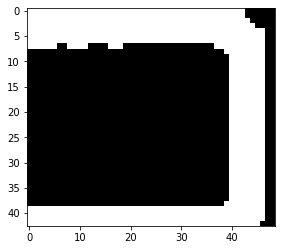

2 5
(43, 49)


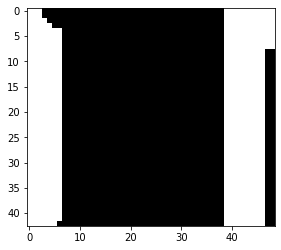

2 6
(43, 49)


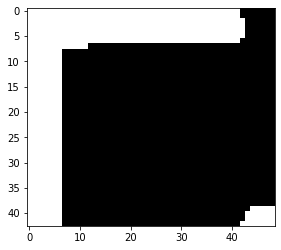

2 7
(43, 49)


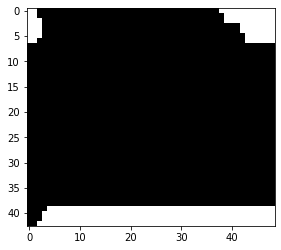

2 8
(43, 49)


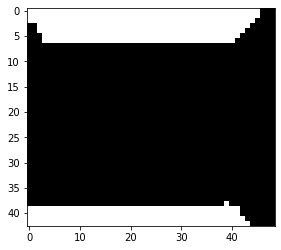

2 9
(43, 45)


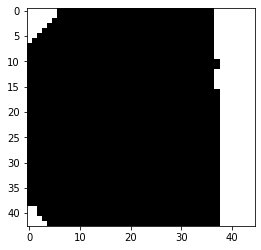

3 0
(43, 44)


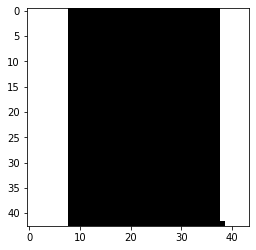

3 1
(43, 49)


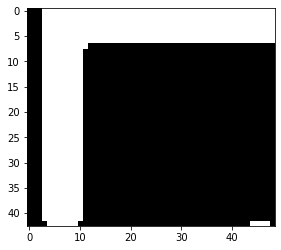

3 2
(43, 49)


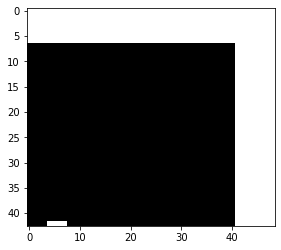

3 3
(43, 49)


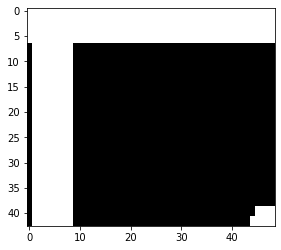

3 4
(43, 49)


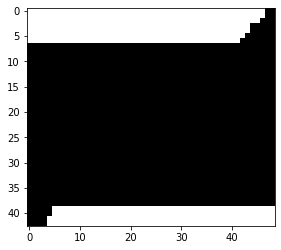

3 5
(43, 49)


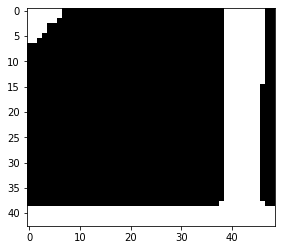

3 6
(43, 49)


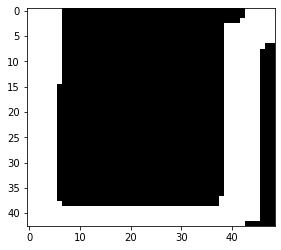

3 7
(43, 49)


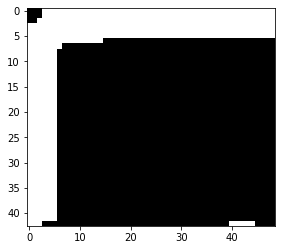

3 8
(43, 49)


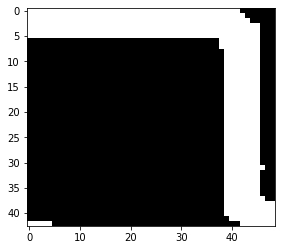

3 9
(43, 45)


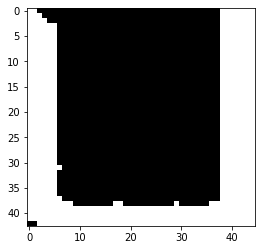

4 0
(43, 44)


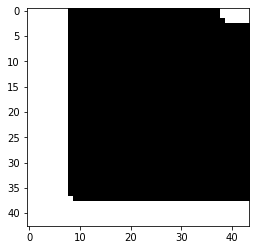

4 1
(43, 49)


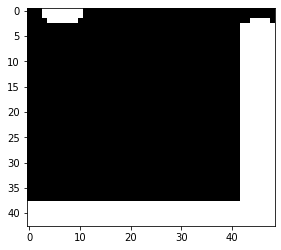

4 2
(43, 49)


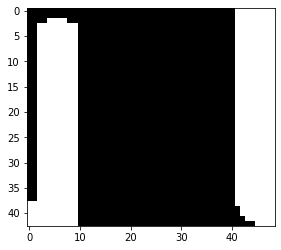

4 3
(43, 49)


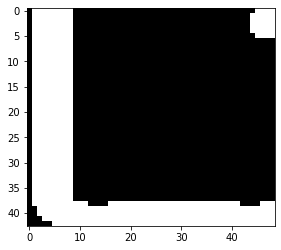

4 4
(43, 49)


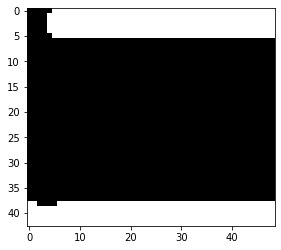

4 5
(43, 49)


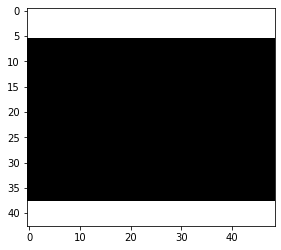

4 6
(43, 49)


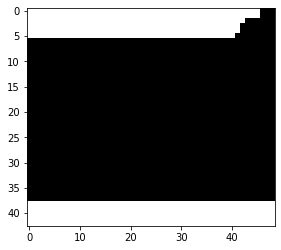

4 7
(43, 49)


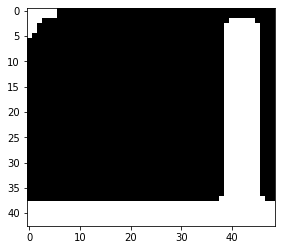

4 8
(43, 49)


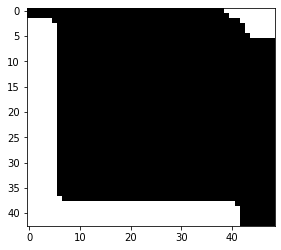

4 9
(43, 45)


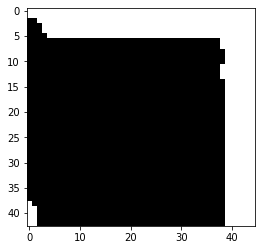

5 0
(43, 44)


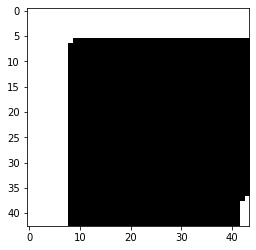

5 1
(43, 49)


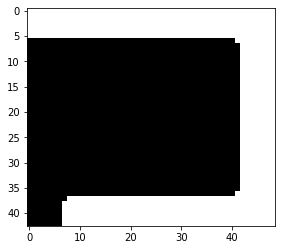

5 2
(43, 49)


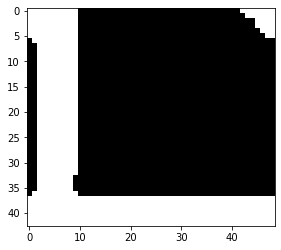

5 3
(43, 49)


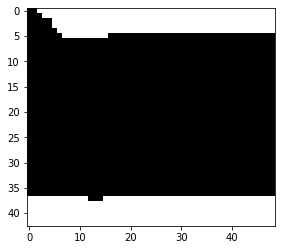

5 4
(43, 49)


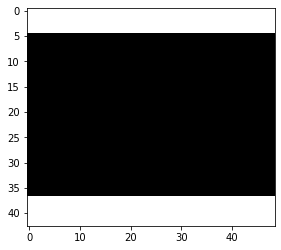

5 5
(43, 49)


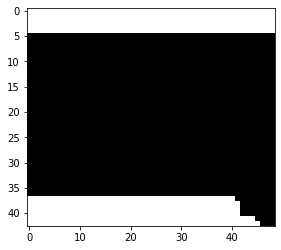

5 6
(43, 49)


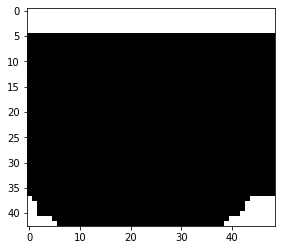

5 7
(43, 49)


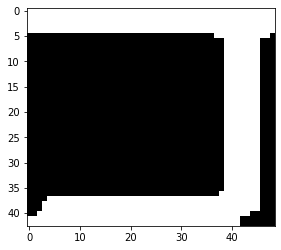

5 8
(43, 49)


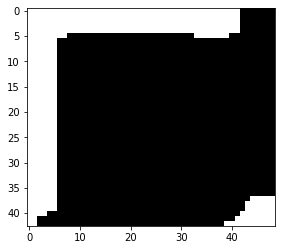

5 9
(43, 45)


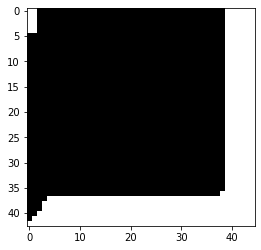

6 0
(43, 44)


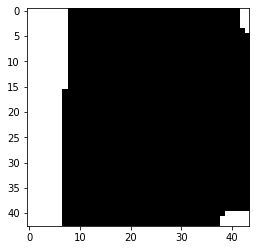

6 1
(43, 49)


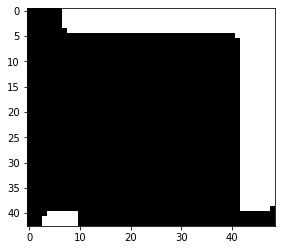

6 2
(43, 49)


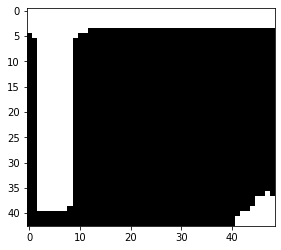

6 3
(43, 49)


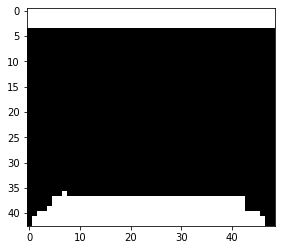

6 4
(43, 49)


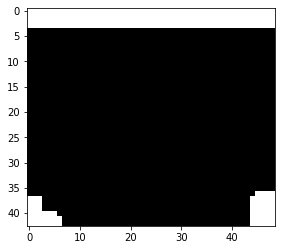

6 5
(43, 49)


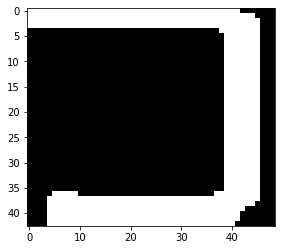

6 6
(43, 49)


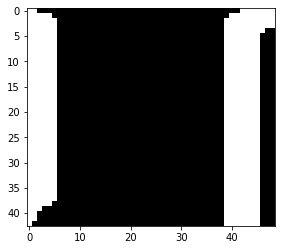

6 7
(43, 49)


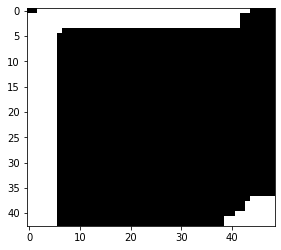

6 8
(43, 49)


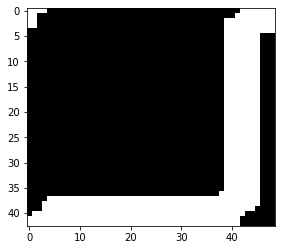

6 9
(43, 45)


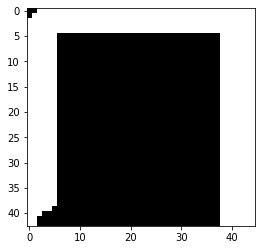

7 0
(43, 44)


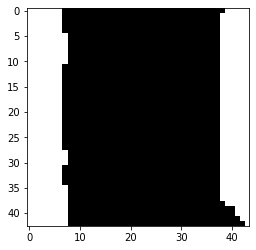

7 1
(43, 49)


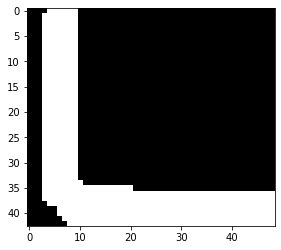

7 2
(43, 49)


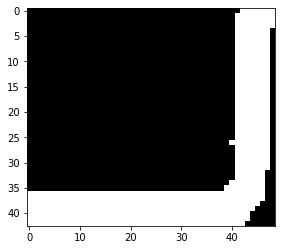

7 3
(43, 49)


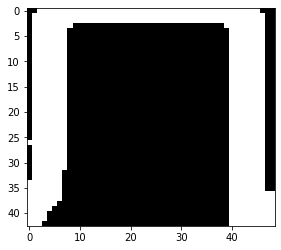

7 4
(43, 49)


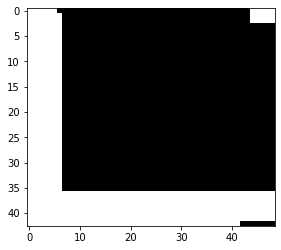

7 5
(43, 49)


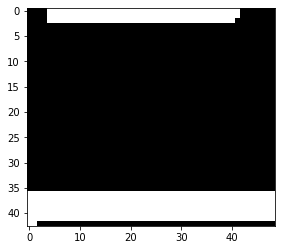

7 6
(43, 49)


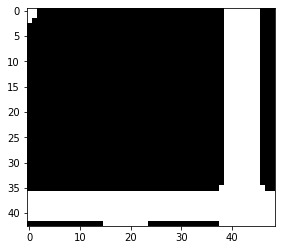

7 7
(43, 49)


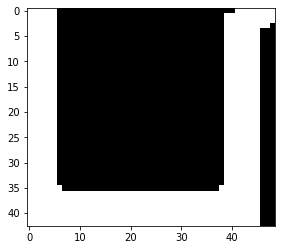

7 8
(43, 49)


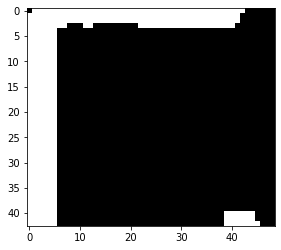

7 9
(43, 45)


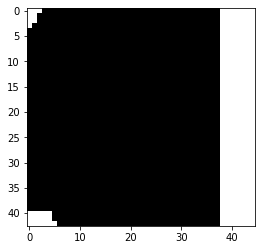

8 0
(43, 44)


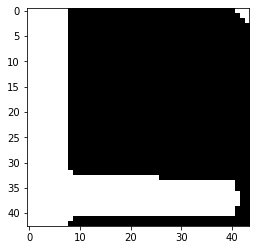

8 1
(43, 49)


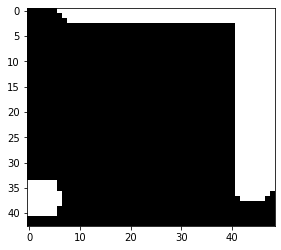

8 2
(43, 49)


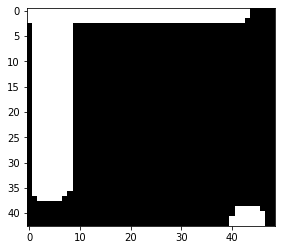

8 3
(43, 49)


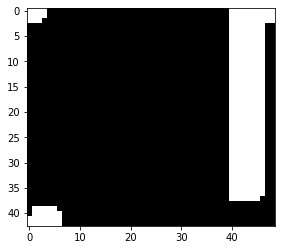

8 4
(43, 49)


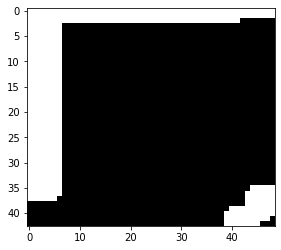

8 5
(43, 49)


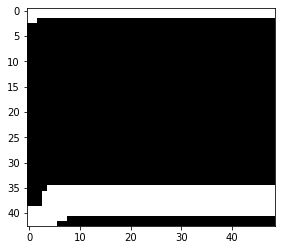

8 6
(43, 49)


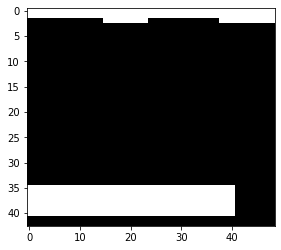

8 7
(43, 49)


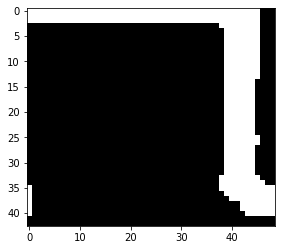

8 8
(43, 49)


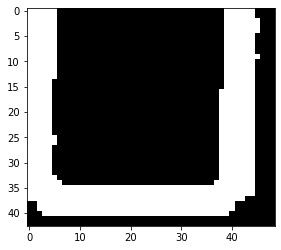

8 9
(43, 45)


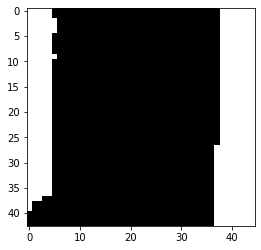

9 0
(41, 44)


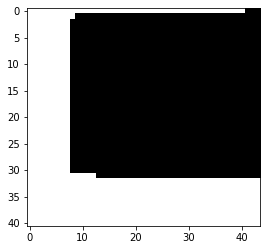

9 1
(41, 49)


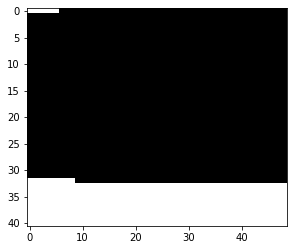

9 2
(41, 49)


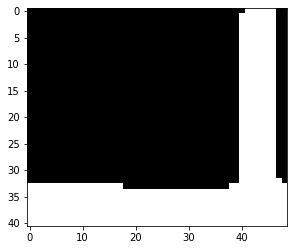

9 3
(41, 49)


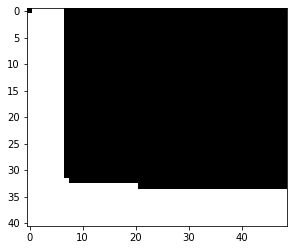

9 4
(41, 49)


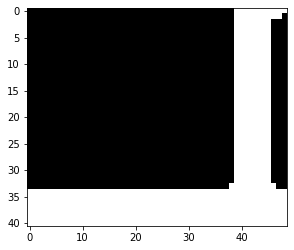

9 5
(41, 49)


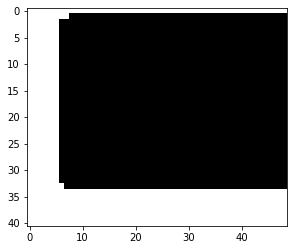

9 6
(41, 49)


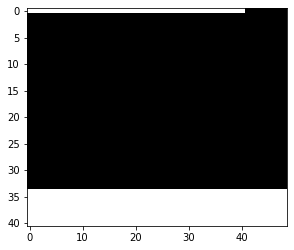

9 7
(41, 49)


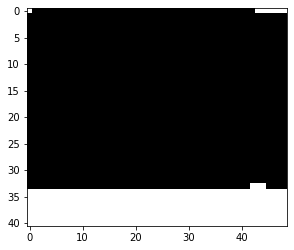

9 8
(41, 49)


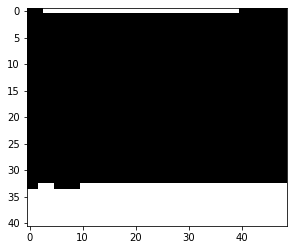

9 9
(41, 45)


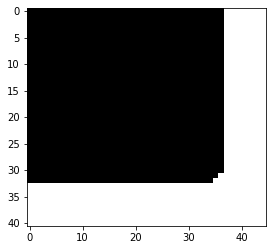

In [25]:
i=0 
array = []
ret2,resized_image = cv.threshold(resized_image,100,255,cv.THRESH_BINARY_INV)
plt.imshow(resized_image,cmap= 'gray')
plt.show()
for i in range(0,resized_image.shape[0],iincrement):
    
    array.append([])
    if(i==0):
        y = i
        
        iiicrement = 44
    else:
        y = i-1
        
        iiicrement = 43
    for j in range(0,resized_image.shape[1],jincrement):
            print(i//40,j//40)
            if(j==0):
                
                img_temp = resized_image[y:y+iiicrement,j:j+44]
            else:
                img_temp = resized_image[y:y+iiicrement,j-5:j+44]
                
            north = 0
            west = 0
            east = 0
            south = 0
            x_center = img_temp.shape[1]//2
            y_center = img_temp.shape[0]//2
           
            
            
            north_dir = 0
            while(y_center - north_dir >= 0):
                if(img_temp[y_center-north_dir, x_center] == 255):
                    
                    north = 2
                    break
                north_dir +=1
                
                
            south_dir = 0
            while(y_center + south_dir  < img_temp.shape[0]):
                if(img_temp[y_center+south_dir,x_center] == 255):
                    south = 8
                    
                    break
                south_dir+=1
                
                
            east_dir = 0
            while(x_center + east_dir <  img_temp.shape[1] ):
                if(img_temp[y_center,x_center+east_dir] == 255  or img_temp[15,x_center+east_dir]):
                    east = 4
                    break
                east_dir+=1
                
                
            west_dir =0
            while(x_center-west_dir >= 0):
                if(img_temp[y_center,x_center-west_dir] == 255):
                            west =1
                            break
                west_dir +=1
            
            

            


            



            array[i//40].append(north + south + east + west)
            print(img_temp.shape)


            
            plt.imshow(img_temp,cmap= 'gray')
            plt.show()
            







In [26]:
print(array)

[[3, 2, 10, 10, 10, 10, 6, 11, 2, 6], [5, 5, 3, 10, 10, 6, 9, 6, 13, 5], [5, 9, 8, 10, 14, 5, 3, 8, 10, 4], [5, 3, 6, 3, 10, 12, 13, 3, 6, 13], [9, 12, 5, 9, 10, 10, 10, 12, 9, 6], [3, 14, 9, 10, 10, 10, 2, 14, 3, 12], [1, 6, 3, 10, 2, 14, 5, 3, 12, 7], [5, 9, 12, 7, 9, 10, 12, 13, 3, 4], [9, 6, 3, 4, 3, 10, 10, 6, 13, 5], [11, 8, 12, 9, 12, 11, 10, 8, 10, 12]]


In [27]:
#array =   [[7, 2, 10, 14, 3, 10, 10, 6, 11, 6], [5, 5, 11, 10, 12, 3, 14, 9, 10, 4], [5, 9, 6, 3, 10, 8, 10, 10, 10, 12], [5, 3, 4, 9, 6, 3, 2, 10, 10, 14], [5, 5, 5, 3, 12, 5, 13, 3, 10, 6], [5, 5, 5, 5, 7, 1, 6, 5, 3, 4], [5, 5, 13, 5, 9, 12, 5, 5, 5, 5], [5, 9, 6, 9, 6, 3, 12, 5, 5, 5], [5, 7, 9, 6, 5, 9, 10, 12, 5, 5], [9, 8, 14, 9, 8, 10, 10, 10, 12, 13]]

In [28]:

maze07_ideal =[
 [
  3, 2, 10, 10, 10, 10, 6, 11, 2, 6], [5, 5, 3, 10, 10, 6, 9, 6, 13, 5],
 [
  5, 9, 8, 10, 14, 5, 3, 8, 10, 4], [5, 3, 6, 3, 10, 12, 13, 3, 6, 13],
 [
  9, 12, 5, 9, 10, 10, 10, 12, 9, 6], [3, 14, 9, 10, 10, 10, 2, 14, 3, 12],
 [
  1, 6, 3, 10, 2, 14, 5, 3, 12, 7], [5, 9, 12, 7, 9, 10, 12, 13, 3, 4],
 [
  9, 6, 3, 4, 3, 10, 10, 6, 13, 5], [11, 8, 12, 9, 12, 11, 10, 8, 10, 12]]

In [29]:
for i in  range(10):
    for j in range(10):
        
        if(array[i][j]!=maze07_ideal[i][j]):
           
        
            print(f"{i}{j} {array [i][j] } and{ maze07_ideal[i][j] }false")
            

In [30]:
all(array )== all(maze07_ideal)

True

In [31]:
def compare_maze_arrays(maze_array_generated, maze_array_ideal):
    
    maze_array_score = 0
    if abs(len(maze_array_generated) - len(maze_array_ideal)) == 0:
        for maze_row in range(0, len(maze_array_ideal)):
            for row_cell in range(0, len(maze_array_ideal[maze_row])):
                print(f"maze  {maze_array_generated[maze_row][row_cell]} and { maze_array_ideal[maze_row][row_cell] }" )
                if maze_array_generated[maze_row][row_cell] == maze_array_ideal[maze_row][row_cell]:
                    maze_array_score = maze_array_score + 1
                else:
                    maze_array_score = maze_array_score - 1

    else:
        maze_array_score = 0
    return maze_array_score


In [32]:
 print(compare_maze_arrays(array,maze07_ideal))

maze  3 and 3
maze  2 and 2
maze  10 and 10
maze  10 and 10
maze  10 and 10
maze  10 and 10
maze  6 and 6
maze  11 and 11
maze  2 and 2
maze  6 and 6
maze  5 and 5
maze  5 and 5
maze  3 and 3
maze  10 and 10
maze  10 and 10
maze  6 and 6
maze  9 and 9
maze  6 and 6
maze  13 and 13
maze  5 and 5
maze  5 and 5
maze  9 and 9
maze  8 and 8
maze  10 and 10
maze  14 and 14
maze  5 and 5
maze  3 and 3
maze  8 and 8
maze  10 and 10
maze  4 and 4
maze  5 and 5
maze  3 and 3
maze  6 and 6
maze  3 and 3
maze  10 and 10
maze  12 and 12
maze  13 and 13
maze  3 and 3
maze  6 and 6
maze  13 and 13
maze  9 and 9
maze  12 and 12
maze  5 and 5
maze  9 and 9
maze  10 and 10
maze  10 and 10
maze  10 and 10
maze  12 and 12
maze  9 and 9
maze  6 and 6
maze  3 and 3
maze  14 and 14
maze  9 and 9
maze  10 and 10
maze  10 and 10
maze  10 and 10
maze  2 and 2
maze  14 and 14
maze  3 and 3
maze  12 and 12
maze  1 and 1
maze  6 and 6
maze  3 and 3
maze  10 and 10
maze  2 and 2
maze  14 and 14
maze  5 and 5
maze  